In [ ]:
import torch
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cpu


In [ ]:
import torch.nn as nn

In [ ]:
class Flatten(nn.Module):
  def forward(self, input):
    return input.view(input.size(0), -1)

In [ ]:
class UnFlatten(nn.Module):
  def forward(self, input, size=1024):
    return input.view(input.size(0), size, 1, 1)

In [ ]:
class VAE(nn.Module):
  def __init__(self, image_channels=3, h_dim=1024, z_dim=64):
    super(VAE, self).__init__()
    self.encoder = nn.Sequential(
      nn.Conv2d(3, 32, kernel_size=2, stride=2),
      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(32, 64, kernel_size=2, stride=2),
      nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(64, 128, kernel_size=2, stride=2),
      nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(128, 256, kernel_size=2, stride=2),
      nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(256, 512, kernel_size=2, stride=2),
      nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(512, 1024, kernel_size=2, stride=2),
      nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(1024, 1024, kernel_size=2, stride=2),
      nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      Flatten()
    )
    self.fc1 = nn.Linear(h_dim, z_dim)
    self.fc2 = nn.Linear(h_dim, z_dim)
    self.fc3 = nn.Linear(z_dim, h_dim)
    self.decoder = nn.Sequential(
      UnFlatten(),
      nn.ConvTranspose2d(1024, 1024, kernel_size=2, stride=2),
      nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2),
      nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
      nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
      nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
      nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(32, 3, kernel_size=2, stride=2),
      nn.BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.Sigmoid(),
    )

  def reparameterize(self, mu, logvar):
    std = logvar.mul(0.5).exp_()
    # return torch.normal(mu, std)
    esp = torch.randn(*mu.size())
    z = mu+std*esp.to(device)
    return z

  def bottleneck(self, h):
    mu, logvar = self.fc1(h), self.fc2(h)
    z = self.reparameterize(mu, logvar)
    return z, mu, logvar

  def encode(self, x):
    h=self.encoder(x)
    z,mu,logvar=self.bottleneck(h)
    return z, mu, logvar

  def decode(self, z):
    z = self.fc3(z)
    z = self.decoder(z)
    return z

  def forward(self, x):
    z, mu, logvar = self.encode(x)
    z = self.decode(z)
    return z, mu, logvar

In [ ]:
model=VAE()
model.to(device)
print(model)

VAE(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Conv2d(256, 512, kernel_size=(2, 2), stride=(2, 2))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Conv2d(512, 1024, kernel_size=(2, 2), stride=(2, 2))
    (16): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_run

In [ ]:
from torchsummary import summary
summary(model,(3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             416
       BatchNorm2d-2           [-1, 32, 64, 64]              64
              ReLU-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 32, 32]           8,256
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 16, 16]          32,896
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
           Conv2d-10            [-1, 256, 8, 8]         131,328
      BatchNorm2d-11            [-1, 256, 8, 8]             512
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 512, 4, 4]         524,800
      BatchNorm2d-14            [-1, 51

In [ ]:
import torch.nn.functional as F

In [ ]:
def loss_fn(recon_x, x, mu, logvar):
  #BCE = F.binary_cross_entropy(recon_x, x, size_average=False).to(device)
  MSE = F.mse_loss(recon_x, x, reduction='sum')
  # see Appendix B from VAE paper:
  # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
  # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
  KLD = -0.5*torch.mean(1+logvar-mu.pow(2)-logvar.exp()).to(device)
  return MSE+KLD, MSE, KLD

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

#Connect to Google drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
from torchvision import transforms
transformer = transforms.Compose([
  transforms.Resize((128, 128)),
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5] )])

In [ ]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(root = "/content/gdrive/MyDrive/deep learning/Folder/Train", transform = transformer)

In [ ]:
import torch.utils.data as Data
loader = Data.DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True)

#Try to send one batch of training images to NN

In [ ]:
for batchX, _ in loader:
  break;
print(batchX.shape)

torch.Size([16, 3, 128, 128])


### encoder

In [ ]:
h = model.encoder(batchX.to(device))
print(h.shape)

torch.Size([16, 1024])


In [ ]:
mu=model.fc1(h)
print(mu.shape)

torch.Size([16, 64])


In [ ]:
logvar=model.fc2(h)
print(logvar.shape)

torch.Size([16, 64])


In [ ]:
std = logvar.mul(0.5).exp_()
print(std.shape)

torch.Size([16, 64])


In [ ]:
esp=torch.randn(*mu.size())
print(esp.shape)

torch.Size([16, 64])


In [ ]:
z=mu+std*esp.to(device)
print(z.shape)

torch.Size([16, 64])


### decode

In [ ]:
z=model.decode(z)

### encoder+decoder together

In [ ]:
tensorY,mu,logvar = model(batchX.to(device))
print(tensorY.shape)

torch.Size([16, 3, 128, 128])


In [ ]:
loss, mse,kld = loss_fn(tensorY, batchX.to(device), mu, logvar)
print(loss)

tensor(798987.7500, grad_fn=<AddBackward0>)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [ ]:
def ConvertTensorToArray (tensorInput):
  imgTensor = torchvision.utils.make_grid(tensorInput)
  imgArray = imgTensor.numpy()
  imgArray1 = np.zeros((imgArray.shape[1], imgArray.shape[2], 3))
  imgArray1[:,:,0] = imgArray[0, :, :]
  imgArray1[:,:,1] = imgArray[1, :, :]
  imgArray1[:,:,2] = imgArray[2, :, :]
  imgArray1 = imgArray1*0.5+0.5
  return imgArray1

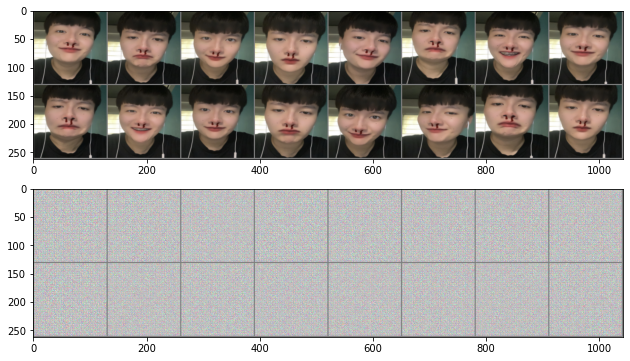

In [ ]:
#compare Input vs Output
fig,axs=plt.subplots(2,1,figsize=(12,6))
imgArray=ConvertTensorToArray(batchX)
axs[0].imshow(imgArray)
imgArray=ConvertTensorToArray(tensorY.cpu())
axs[1].imshow(imgArray)
plt.show()

#Training loop

In [ ]:
model.train()
print("")

In [ ]:
lossLst = []
for epoch in range(600):
  if(epoch%5==0):
    print("\nepoch = ", epoch, end = ", ")
    print("batch: ", end="")
  for step, (batchX, _) in enumerate(loader):
    if(epoch%5==0 and step%5==0):
      print(step, end = ",")
    tensorY,mu,logvar = model(batchX.to(device))
    loss, mse,kld = loss_fn(tensorY, batchX.to(device), mu, logvar)
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch =  0, batch: 0,
epoch =  5, batch: 0,
epoch =  10, batch: 0,
epoch =  15, batch: 0,
epoch =  20, batch: 0,
epoch =  25, batch: 0,
epoch =  30, batch: 0,
epoch =  35, batch: 0,
epoch =  40, batch: 0,
epoch =  45, batch: 0,
epoch =  50, batch: 0,
epoch =  55, batch: 0,
epoch =  60, batch: 0,
epoch =  65, batch: 0,
epoch =  70, batch: 0,
epoch =  75, batch: 0,
epoch =  80, batch: 0,
epoch =  85, batch: 0,
epoch =  90, batch: 0,
epoch =  95, batch: 0,
epoch =  100, batch: 0,
epoch =  105, batch: 0,
epoch =  110, batch: 0,
epoch =  115, batch: 0,
epoch =  120, batch: 0,
epoch =  125, batch: 0,
epoch =  130, batch: 0,
epoch =  135, batch: 0,
epoch =  140, batch: 0,
epoch =  145, batch: 0,
epoch =  150, batch: 0,
epoch =  155, batch: 0,
epoch =  160, batch: 0,
epoch =  165, batch: 0,
epoch =  170, batch: 0,
epoch =  175, batch: 0,
epoch =  180, batch: 0,
epoch =  185, batch: 0,
epoch =  190, batch: 0,
epoch =  195, batch: 0,
epoch =  200, batch: 0,
epoch =  205, batch: 0,
epoch =  210,

In [ ]:
torch.save(model.state_dict(),"VAE800.pkl")

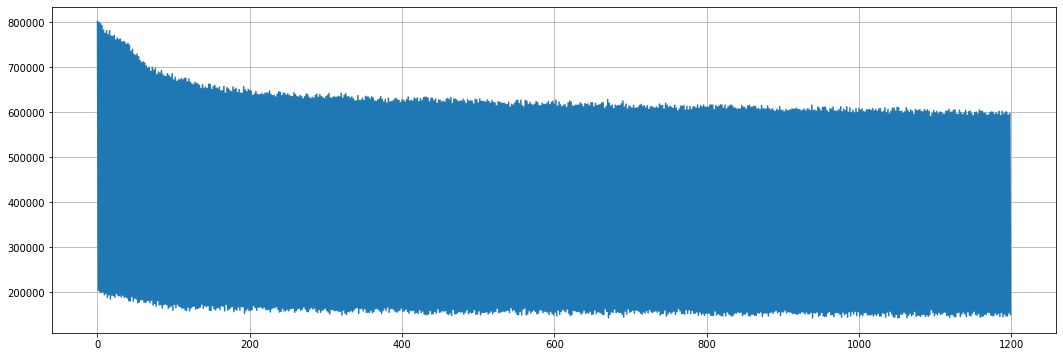

In [ ]:
fig=plt.figure(figsize=(18, 6))
plt.plot(lossLst)
plt.grid()

#Test with training data

In [ ]:
model.eval()
print("")

In [ ]:
for batchX,batchY in loader:
  break;
print(batchX.shape)

torch.Size([16, 3, 128, 128])


In [ ]:
tensorY,mu,logvar = model(batchX.to(device))
print(tensorY.shape)

torch.Size([16, 3, 128, 128])


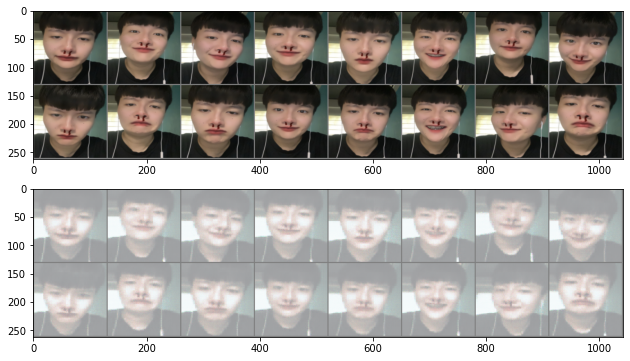

In [ ]:
fig,axs=plt.subplots(2,1,figsize=(12,6))
imgArray=ConvertTensorToArray(batchX)
axs[0].imshow(imgArray)
imgArray=ConvertTensorToArray(tensorY.cpu())
axs[1].imshow(imgArray)
plt.show()

#Test with un-seen test data

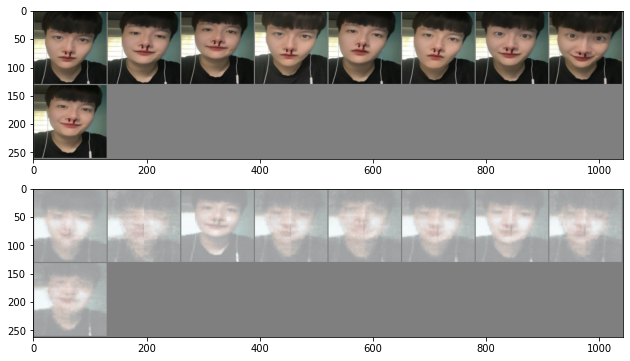

In [ ]:
test_dataset = datasets.ImageFolder(root = "/content/gdrive/MyDrive/deep learning/Folder/Test", transform = transformer)
loader = Data.DataLoader(
    dataset=test_dataset,
    batch_size=16,
    shuffle=True)
for batchX, _ in loader:
  break;
tensorY,mu,logvar = model(batchX.to(device))

fig,axs=plt.subplots(2,1,figsize=(12,6))
imgArray=ConvertTensorToArray(batchX)
axs[0].imshow(imgArray)
imgArray=ConvertTensorToArray(tensorY.cpu())
axs[1].imshow(imgArray)
plt.show()

In [ ]:
torch.save(model.state_dict(), "AE800.pt")

In [ ]:
model=VAE() #build NN architecture
model.load_state_dict(torch.load("AE800.pt")) #load model weights
model.to(device)
model.eval()

VAE(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Conv2d(256, 512, kernel_size=(2, 2), stride=(2, 2))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Conv2d(512, 1024, kernel_size=(2, 2), stride=(2, 2))
    (16): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_run

In [ ]:
# batchY in tensor, array, and reshape
arrayY = batchY.cpu().detach().numpy()
arrayY1 = arrayY.reshape(arrayY.shape[0], 1)
print(batchY, "\n", arrayY, "\n", arrayY.shape, "\n", arrayY1, "\n", arrayY1.shape)

tensor([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0]) 
 [0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0] 
 (16,) 
 [[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]] 
 (16, 1)


In [ ]:
tensorY=model.encoder(batchX.to(device))
print(tensorY.shape)

torch.Size([9, 1024])


In [ ]:
tensorY.cpu().detach().numpy().shape

(9, 1024)

In [ ]:

arrayY = np.array(tensorY.cpu().detach().numpy())
print(arrayY.shape)

(9, 1024)


In [ ]:

arrayY2 = np.array(tensorY.cpu().detach().numpy())

In [ ]:

arrayY3 = np.concatenate((arrayY, arrayY2))
print(arrayY3.shape)

(18, 1024)


Get the latent vectors of all training images

Try to pass a batch of training images to AE to get their latent vectors

In [ ]:
for step, (batchX, batchY) in enumerate(loader):
  tensorY = model.encoder(batchX.to(device))
  if(step==0):
    arrayX = np.array(tensorY.cpu().detach().numpy())
    arrayY = batchY.cpu().detach().numpy()
  else:
    arrayX = np.concatenate((arrayX, tensorY.cpu().detach().numpy()))
    arrayY = np.concatenate((arrayY, batchY.cpu().detach().numpy()))
print(arrayX.shape, arrayY.shape)

(9, 1024) (9,)


In [ ]:
Use t-SNE to reduce dimensions from 64 to 2 so we can visualize

SyntaxError: ignored

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000)
# try perlexity = 5, 10, 30, 50

In [ ]:
x=tsne.fit_transform(arrayX)
print(x.shape)

(9, 2)


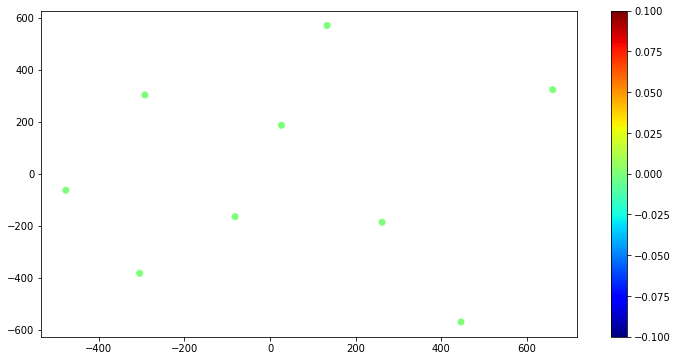

In [ ]:

plt.figure(figsize=(12,6))
plt.scatter(x[:, 0], x[:, 1], c=arrayY, cmap="jet") #we have 5 classes
plt.colorbar()
plt.show()

In [ ]:
x1 = np.array([[10,20,30], [40,50,60]])
y1 = np.array([[100], [200]])
z1 = np.append(x1, y1, axis=1)
print(x1.shape, y1.shape, z1.shape)

In [ ]:
print(x.shape, arrayY.shape)

In [ ]:
arrayY1 = arrayY.reshape(arrayY.shape[0], 1)
print(arrayY1.shape)

In [ ]:
XYArray = np.hstack((x, arrayY1))
print(XYArray.shape)

In [ ]:
# Save data to excel for further Tableau visualization
import pandas as pd
pd.DataFrame(XYArray).to_csv("tSNE.csv")